In [41]:
var('lambda0', 'u1', 'u2', 'r1', 'r2', 'kuu1', 'kuu2', 'kuu3', 'kuu4', 'krr1', 'krr2', 'krr3', 'krr4',
    'kru1', 'kru2', 'kru3', 'kru4')


u = vector([u1, u2])
r = vector([r1, r2])

Kuu = lambda0 * matrix([[kuu1, kuu2], [kuu3, kuu4]])
Krr = lambda0 * matrix([[krr1, krr2], [krr3, krr4]])
Kru = lambda0 * matrix([[kru1, kru2], [kru3, kru4]])

S = Kru.transpose() * Kuu.inverse()
Gamma = Krr - S * Kru # the covariance matrix

# without the multiplicative constant
pdf = exp(-0.5 * ((r.row() - (u * S.transpose()).row()) * Gamma.inverse() * (r - S * u))[0] - 0.5 * log(Gamma.determinant()))

derivative = pdf.diff(lambda0)

In [43]:
partially_evaluated = derivative.substitute({u1 : 1, u2 : 2, r1 : 3, r2 : 4, kuu1 : 5, kuu2 : -1, kuu3 : -2, kuu4 : -3, krr1 : -4, krr2 : -5, krr3 : 6, krr4 : -6, kru1 : 7, kru2 : 8, kru3 : -7, kru4 : -8})

In [46]:
partially_evaluated

(-1.00000000000000/lambda0 - 0.318357264165509/lambda0^2)*e^(0.318357264165509/lambda0 - 0.500000000000000*log(1524/17*lambda0^2))

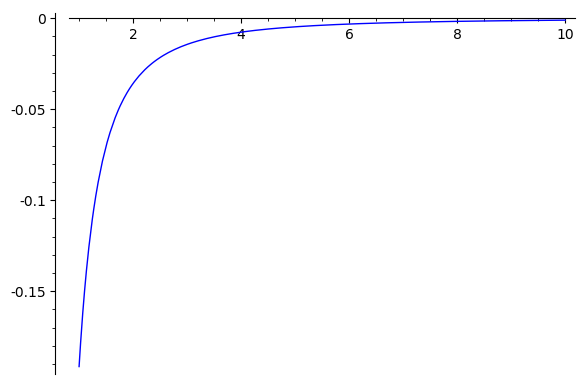

In [52]:
plot(partially_evaluated, (1, 10))

In [125]:
from IPython.display import display, Math

var('B11', 'B21', 'B22', 'u1', 'u2', 'm1', 'm2')

u = vector([u1, u2])
m = vector([m1, m2])
B = matrix([[B11, 0], [B21, B22]])
S = B * B.transpose()
U = (u - m).outer_product(u - m)

pdf = exp(-0.5 * ((u.row() - m.row()) * S.inverse() * (u - m))[0]) / S.determinant()**0.5

substitutes = {u1: 1, u2: 2, m1: 4, m2: 3, B11: 1, B21: 0, B22: 1}

In [129]:
my_derivative = pdf * (S.inverse() * U * S.inverse() - S.inverse()) * B
my_derivative_evaluated = my_derivative.substitute(substitutes)[0][0]

In [130]:
real_derivative = pdf.diff(B11)
real_derivative_evaluated = real_derivative.substitute(substitutes)

In [135]:
bool(my_derivative.simplify_full()[0][0]==real_derivative.simplify_full())

True

In [5]:
display(Math(latex(real_derivative_evaluated)))

<IPython.core.display.Math object>

In [6]:
display(Math(latex(my_derivative_evaluated)))

<IPython.core.display.Math object>

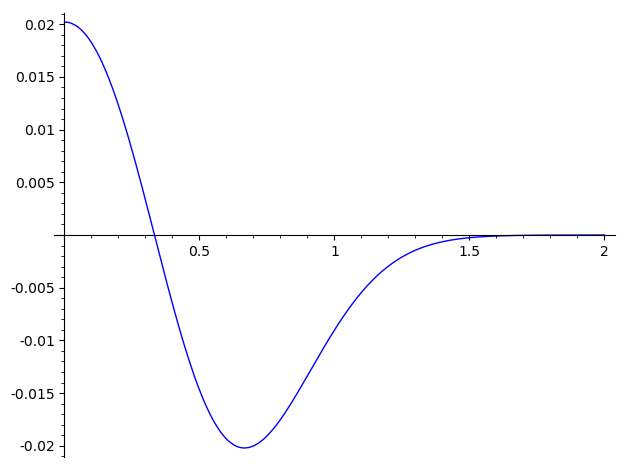

In [7]:
plot(real_derivative_evaluated, (0, 2))

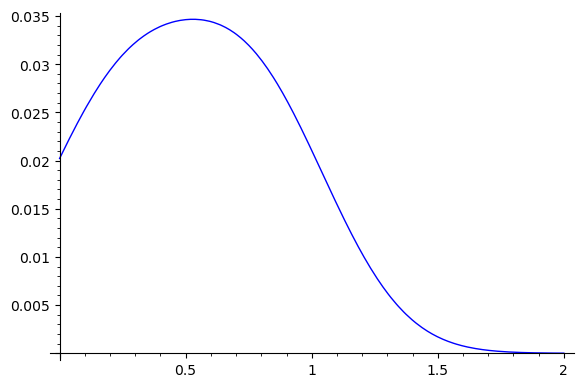

In [9]:
plot(my_derivative_evaluated, (0, 2))

In [71]:
substitutions = {u1: 1, u2: 2, m1: 4, m2: 3}

In [107]:
f1 = -0.5 * (u.row() - m.row()) * S.inverse() * (u - m)

f1_my_derivative = (S.inverse() * (u - m)) * ((u.row() - m.row()) * B.transpose().inverse())
f1_real_derivative = f1.diff(B11)

f1_my_derivative_evaluated = f1_my_derivative.substitute(substitutions)
f1_real_derivative_evaluated = f1_real_derivative.substitute(substitutions)[0]

TypeError: unsupported operand parent(s) for *: 'Vector space of dimension 2 over Symbolic Ring' and 'Full MatrixSpace of 1 by 2 dense matrices over Symbolic Ring'

In [76]:

display(Math(latex(f1_my_derivative_evaluated)))
#plot(f1_my_derivative_evaluated, (0.1, 2))

<IPython.core.display.Math object>

In [74]:
display(Math(latex(f1_real_derivative_evaluated)))
#plot(f1_real_derivative_evaluated, (0.1, 2))

<IPython.core.display.Math object>

In [66]:
U

[        (m1 - u1)^2 (m1 - u1)*(m2 - u2)]
[(m1 - u1)*(m2 - u2)         (m2 - u2)^2]

In [51]:
f2 = -0.5 * log(S.determinant())

f2_my_derivative = -B.transpose().inverse()
f2_real_derivative = f2.diff(B11)

f2_my_derivative_evaluated = f2_my_derivative.substitute(substitutions)[0][0]
f2_real_derivative_evaluated = f2_real_derivative.substitute(substitutions)

<IPython.core.display.Math object>

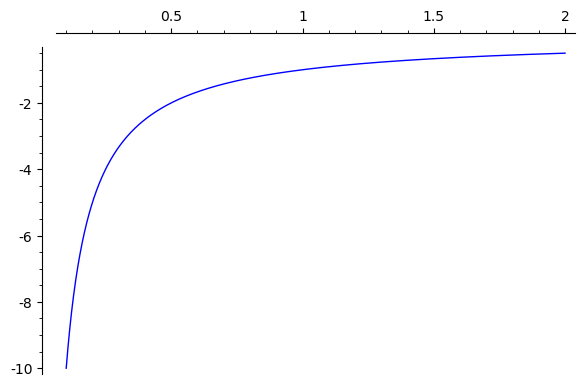

In [52]:
display(Math(latex(f2_my_derivative_evaluated)))
plot(f2_my_derivative_evaluated, (0.1, 2))

<IPython.core.display.Math object>

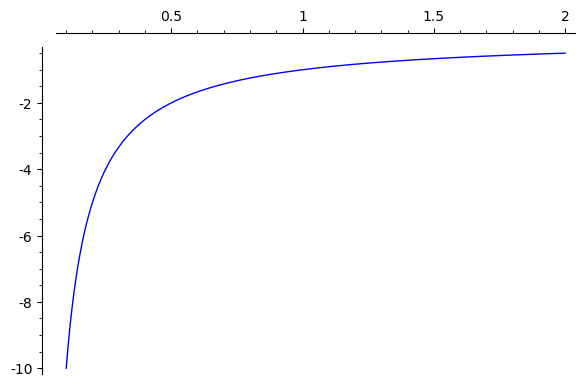

In [53]:
display(Math(latex(f2_real_derivative_evaluated)))
plot(f2_real_derivative_evaluated, (0.1, 2))

In [118]:
var('B11', 'B21', 'B22', 'x1', 'x2')
x = vector([x1, x2])
B = matrix([[B11, 0], [B21, B22]])
S = B * B.transpose()

f1 = x.row() * S.inverse() * x

In [122]:
#f1_mine = (2 * B21 * x1**2 - 2 * B11 * x1 * x2) / (B11**2 * B22**2)
f1_mine = -2 * S.inverse() * x.outer_product(x) * S.inverse() * B
f1_real = f1.diff(B21)

In [123]:
display(Math(latex(f1_real.simplify_full()[0])))

<IPython.core.display.Math object>

In [124]:
display(Math(latex(f1_mine[1][0].simplify_full())))

<IPython.core.display.Math object>

In [97]:
substitutions = {x1: 1, x2: 2, B11: 1, B22: 1}
f1_mine_eval = f1_mine.substitute(substitutions)
f1_real_eval = f1_real.substitute(substitutions)

In [98]:
f1_real_eval.simplify_full()

(2*B21 - 4)

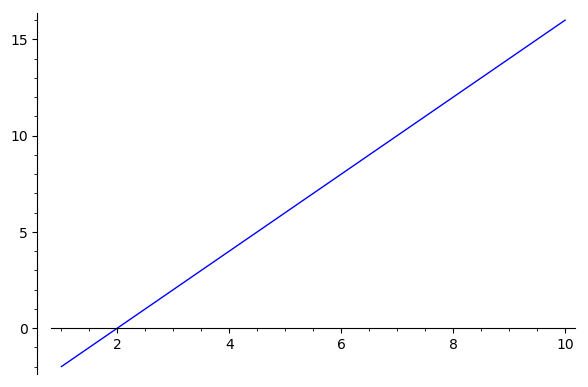

In [99]:
f1_mine = 

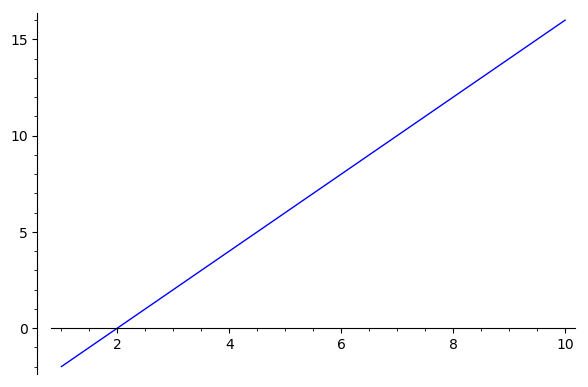

In [100]:
plot(f1_mine_eval, (1, 10))